
--- UNIQUE VALUES ---
filename           1926
scientific_name    1184
common_name        1183
latitude           1520
longitude          1520
sighting_date       349
blip_caption       1369
country              63
state               229
city                597
avg_temp_C          320
elevation_m         595
NDVI_value          856
NDVI_Category         5
dist_to_water_m     148
month                12
year                 22
dtype: int64

--- SUMMARY STATISTICS ---
          latitude    longitude                  sighting_date   avg_temp_C  \
count  1926.000000  1926.000000                           1926  1924.000000   
mean     26.678357   -39.793081  2024-06-17 21:34:12.336448768    14.719491   
min     -65.063132  -159.705374            1969-12-31 00:00:00   -22.200000   
25%      21.908923   -95.672263            2024-06-29 06:00:00    10.200000   
50%      34.633024   -73.773787            2025-12-31 00:00:00    15.000000   
75%      43.183828     2.147054            2026-01-17 

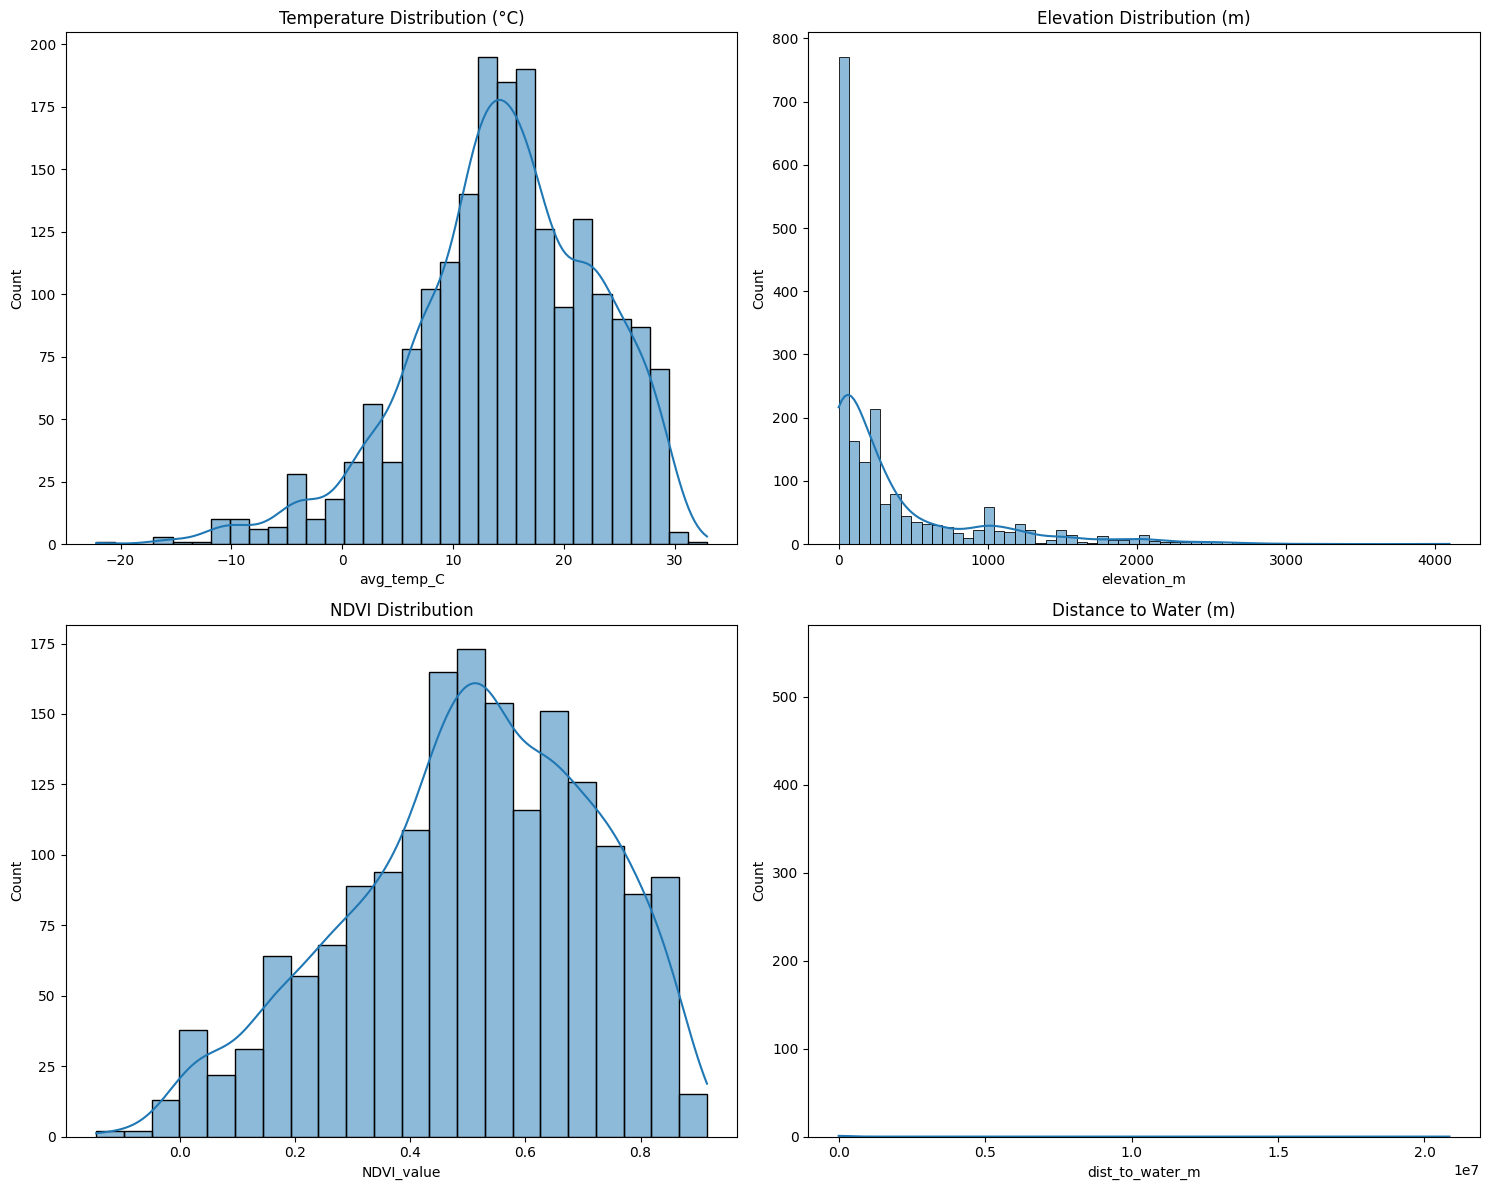

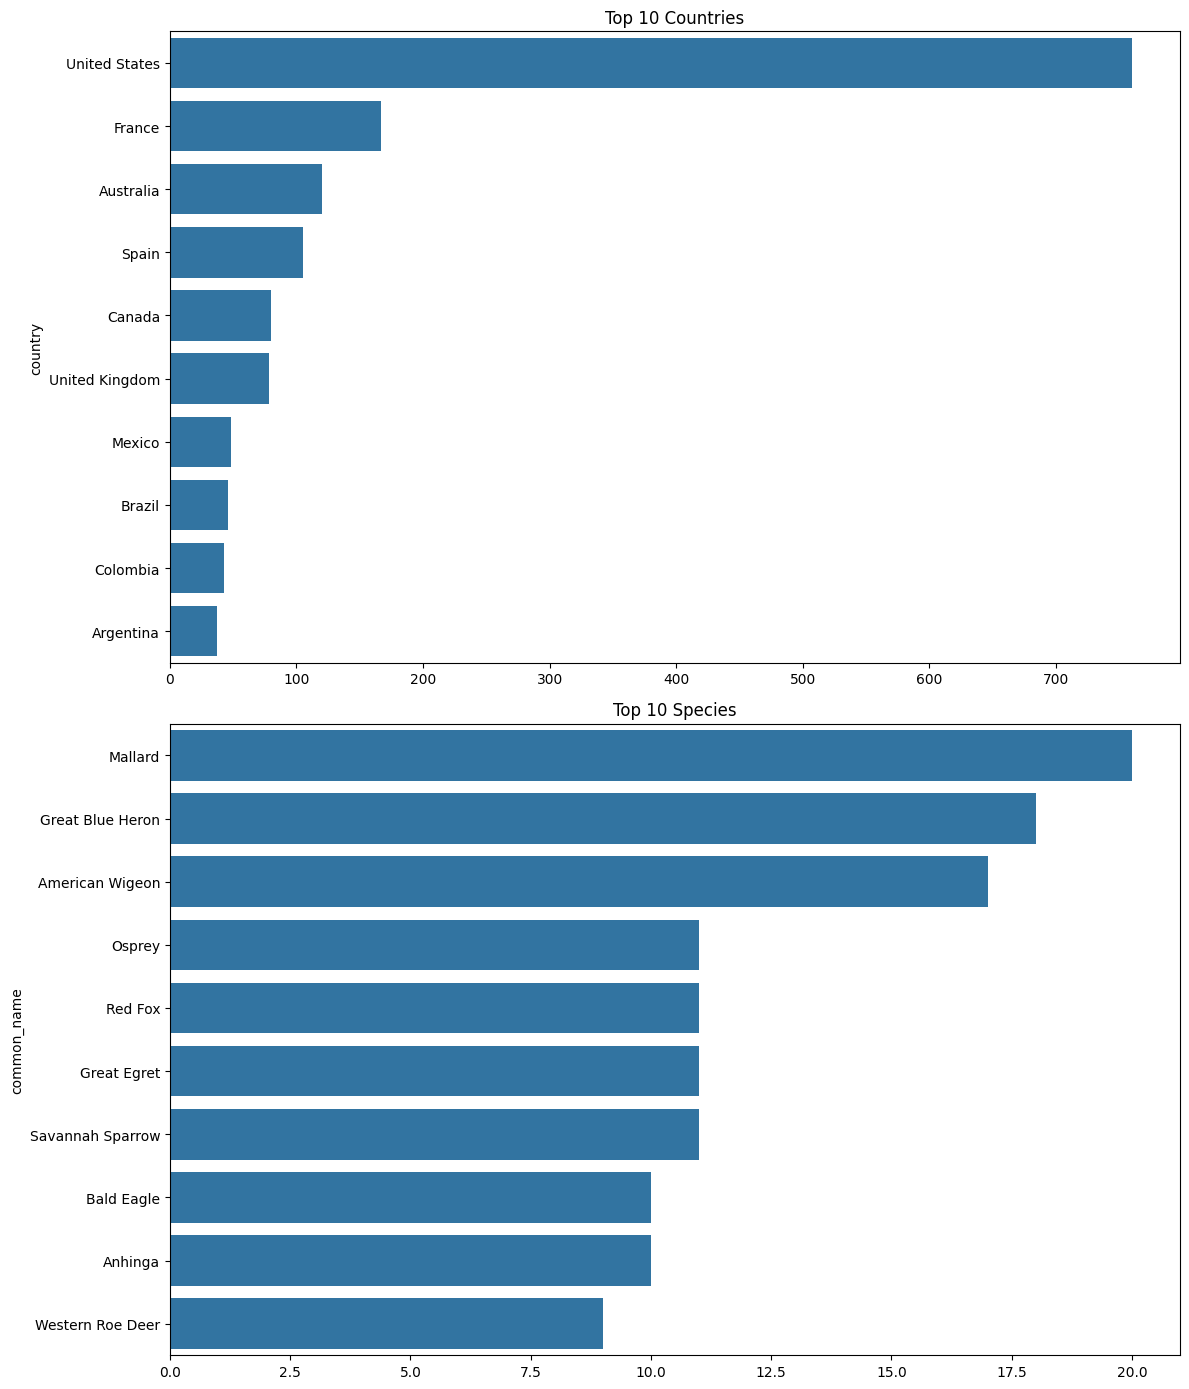

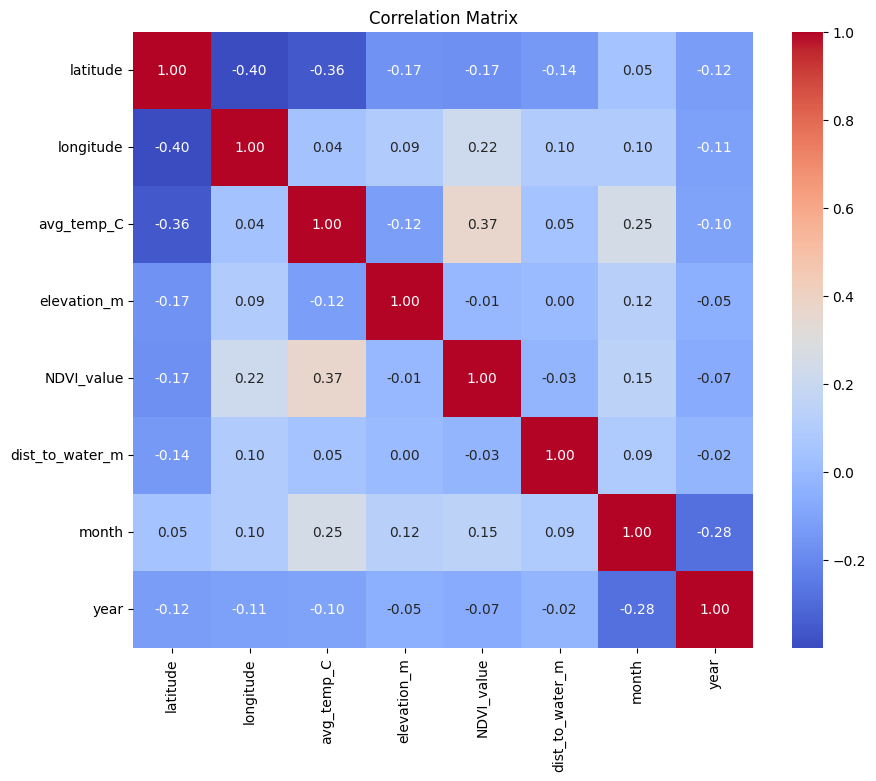

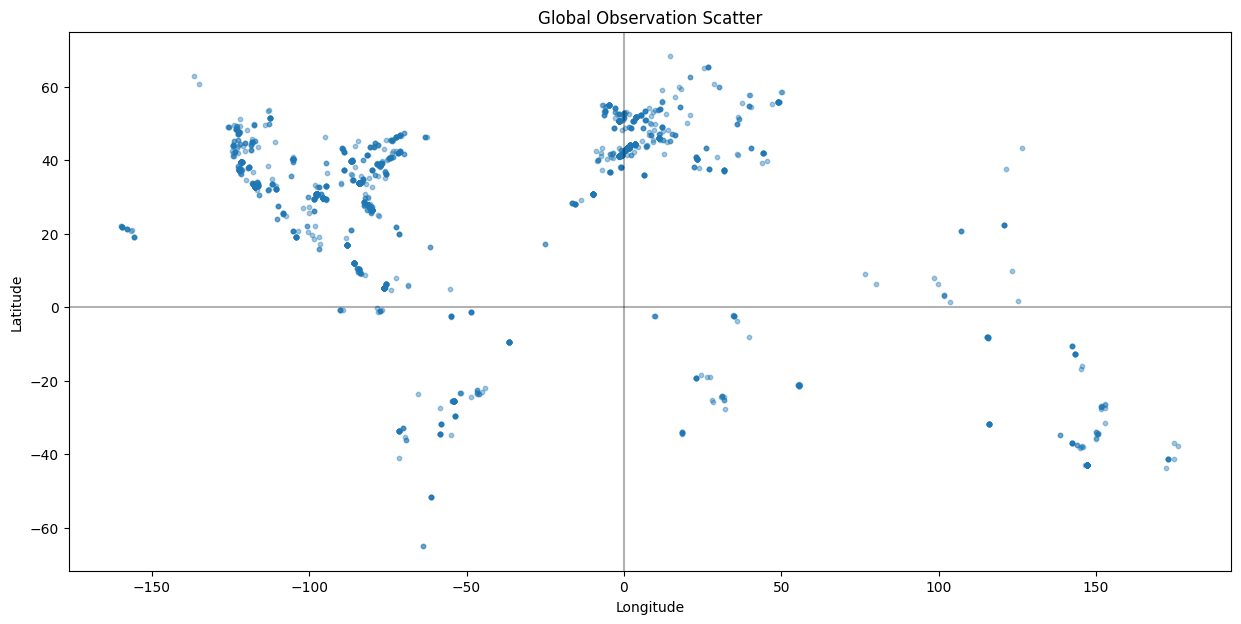

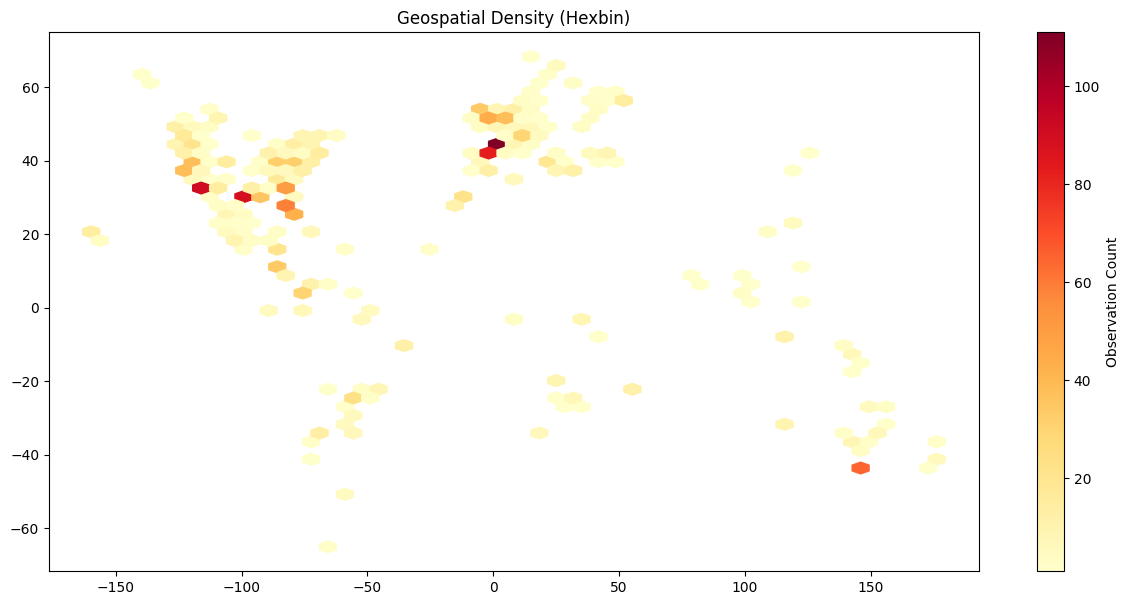

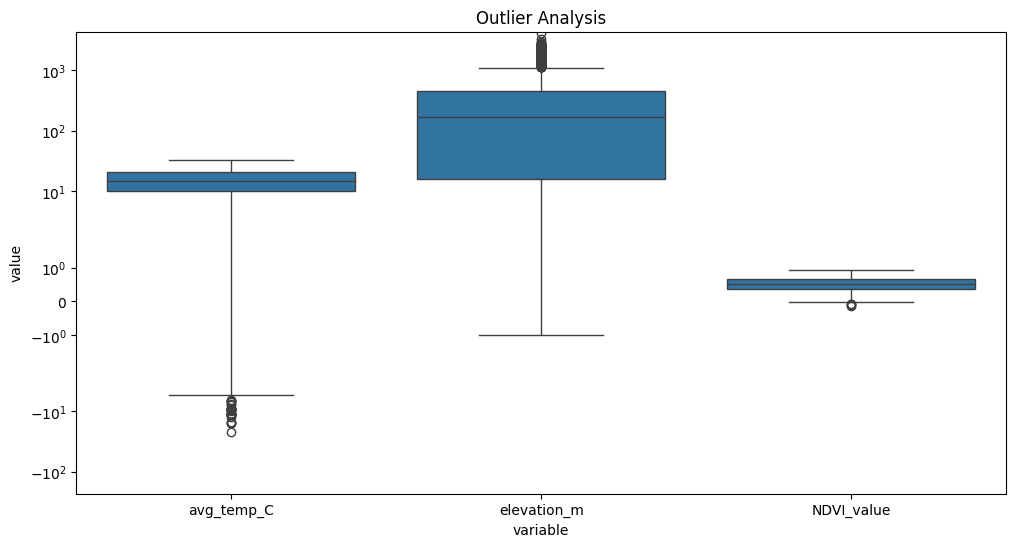

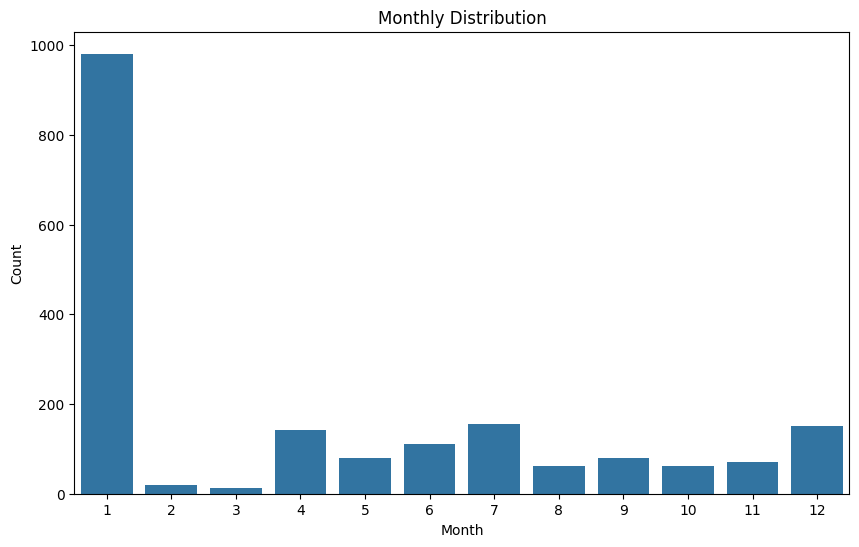

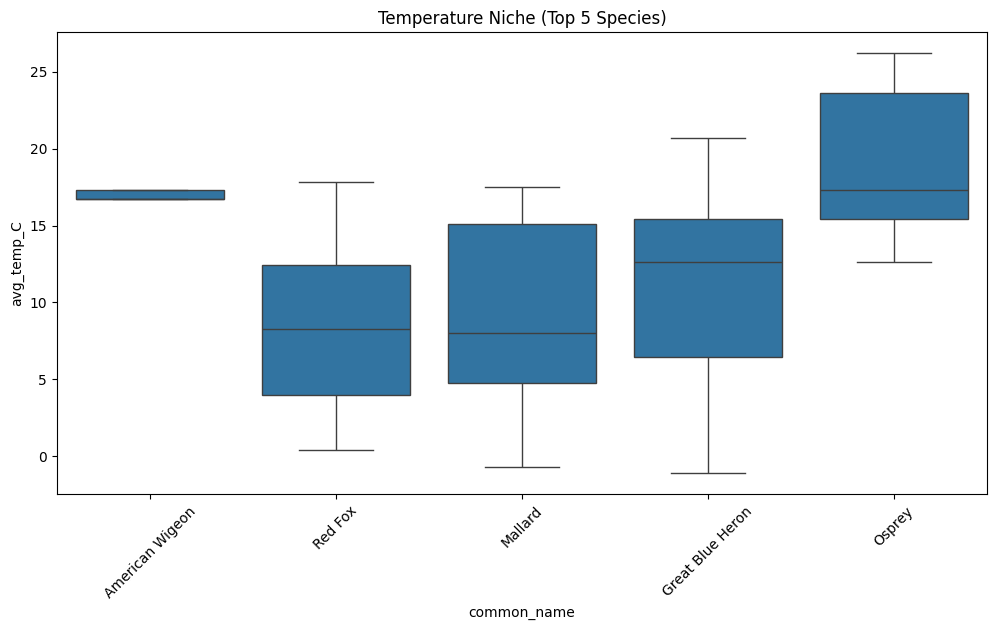

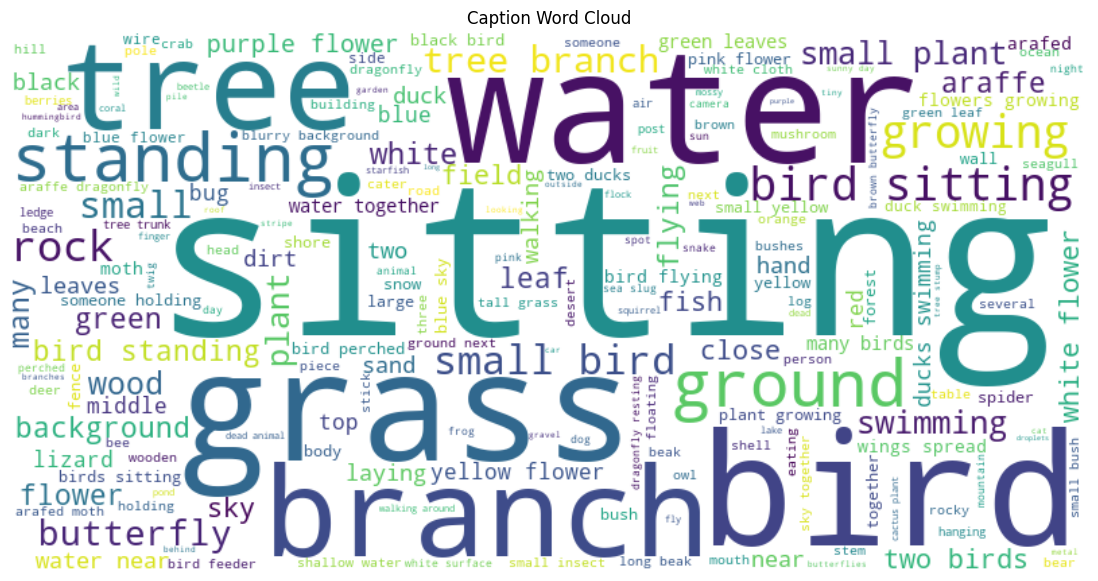


EDA COMPLETE — All visualizations displayed successfully.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

# -------------------------------
# 1. LOAD DATASET
# -------------------------------
df = pd.read_csv('gmgbd_final_pro_ultimate.csv')

# -------------------------------
# 2. DATA CLEANING
# -------------------------------
cols_to_fix = ['avg_temp_C', 'elevation_m', 'NDVI_value', 'dist_to_water_m']
df[cols_to_fix] = df[cols_to_fix].replace(-999, np.nan)

df['sighting_date'] = pd.to_datetime(df['sighting_date'], errors='coerce')
df['month'] = df['sighting_date'].dt.month
df['year'] = df['sighting_date'].dt.year

# -------------------------------
# 3. BASIC INFO
# -------------------------------
print("\n--- UNIQUE VALUES ---")
print(df.nunique())

print("\n--- SUMMARY STATISTICS ---")
print(df.describe())

# -------------------------------
# 4. NUMERICAL DISTRIBUTIONS
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(df['avg_temp_C'].dropna(), kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution (°C)')

sns.histplot(df['elevation_m'].dropna(), kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Elevation Distribution (m)')

sns.histplot(df['NDVI_value'].dropna(), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('NDVI Distribution')

sns.histplot(df['dist_to_water_m'].dropna(), kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distance to Water (m)')

plt.tight_layout()
plt.show()

# -------------------------------
# 5. TOP CATEGORIES
# -------------------------------
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, ax=axes[0])
axes[0].set_title('Top 10 Countries')

top_species = df['common_name'].value_counts().head(10)
sns.barplot(x=top_species.values, y=top_species.index, ax=axes[1])
axes[1].set_title('Top 10 Species')

plt.tight_layout()
plt.show()

# -------------------------------
# 6. CORRELATION MATRIX
# -------------------------------
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# -------------------------------
# 7. GLOBAL DISTRIBUTION (SCATTER)
# -------------------------------
plt.figure(figsize=(15, 7))
plt.scatter(df['longitude'], df['latitude'], alpha=0.4, s=10)
plt.axhline(0, color='black', alpha=0.3)
plt.axvline(0, color='black', alpha=0.3)
plt.title('Global Observation Scatter')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# -------------------------------
# 8. GEO DENSITY (HEXBIN)
# -------------------------------
plt.figure(figsize=(15, 7))
hb = plt.hexbin(df['longitude'], df['latitude'], gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(hb, label='Observation Count')
plt.title('Geospatial Density (Hexbin)')
plt.show()

# -------------------------------
# 9. OUTLIER ANALYSIS
# -------------------------------
plt.figure(figsize=(12, 6))
df_melted = df.melt(value_vars=['avg_temp_C', 'elevation_m', 'NDVI_value'])
sns.boxplot(data=df_melted, x='variable', y='value')
plt.yscale('symlog')
plt.title('Outlier Analysis')
plt.show()

# -------------------------------
# 10. SEASONALITY
# -------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df.dropna(subset=['month']))
plt.title('Monthly Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# -------------------------------
# 11. SPECIES ENVIRONMENTAL NICHE
# -------------------------------
top_5_species = df['common_name'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[df['common_name'].isin(top_5_species)],
    x='common_name',
    y='avg_temp_C'
)
plt.title('Temperature Niche (Top 5 Species)')
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 12. WORD CLOUD (CAPTIONS)
# -------------------------------
text = " ".join(df['blip_caption'].dropna().astype(str))
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Caption Word Cloud')
plt.show()

print("\nEDA COMPLETE — All visualizations displayed successfully.")